In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("train.csv")
gender_submission = pd.read_csv("gender_submission.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()                                                                                               

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


First prediction looks at the sex and return 0 if male and 1 if female 

In [7]:
df_sub = test_data[["Sex", "PassengerId", "Age", "Pclass"]].copy()
df_sub["Survived"] = (df_sub["Sex"] == "female").astype(int)
df_sub.loc[(df_sub["Age"] > 15) & (df_sub["Pclass"] == 3),"Survived"] = 0
df_sub[(df_sub["Sex"] == "female") & (df_sub["Pclass"] == 3)]


,Sex,PassengerId,Age,Pclass,Survived
1,female,893,47.0,3,0
4,female,896,22.0,3,0
6,female,898,30.0,3,0
8,female,900,18.0,3,0
18,female,910,27.0,3,0
...,...,...,...,...,...
383,female,1275,19.0,3,0
408,female,1300,NaN,3,1
409,female,1301,3.0,3,1
410,female,1302,NaN,3,1


In [8]:
df_sub = df_sub.drop(columns=["Sex", "Age", "Pclass"])


In [9]:
df_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [10]:
df_sub.to_csv("second_model.csv", index = False)

# analyse

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

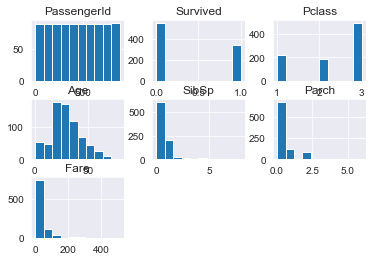

In [11]:
train_data.hist()

In [12]:
import seaborn as sns

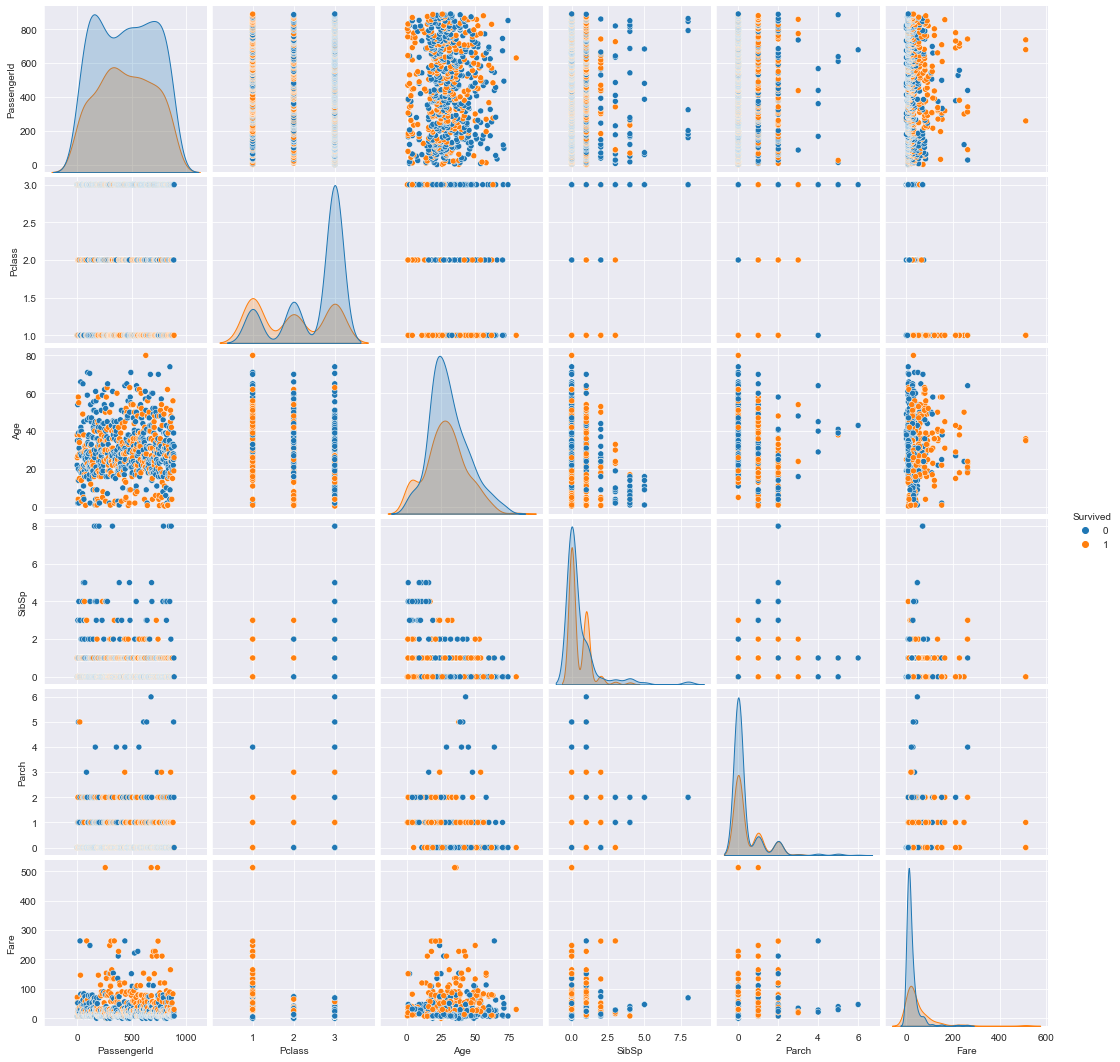

In [13]:
sns.pairplot(train_data, hue="Survived")

In [22]:
df_train = train_data[["Survived", "Parch", "Sex", "Pclass"]].copy()
df_train.loc[df_train["Parch"] > 2, "Parch"] = 2

df_train_gruped = df_train.groupby(["Sex", "Pclass", "Parch"])
df_train_gruped["Survived"].mean()

Sex     Pclass  Parch
female  1       0        0.984375
                1        1.000000
                2        0.846154
        2       0        0.888889
                1        0.944444
                2        1.000000
        3       0        0.588235
                1        0.480000
                2        0.294118
male    1       0        0.363636
                1        0.285714
                2        0.555556
        2       0        0.089888
                1        0.500000
                2        0.400000
        3       0        0.121622
                1        0.266667
                2        0.142857
Name: Survived, dtype: float64

<AxesSubplot:>

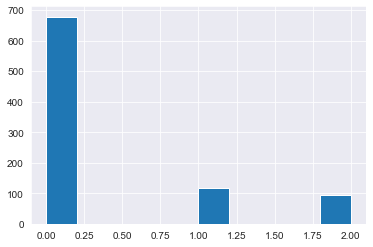

In [24]:
df_train.loc[df_train["Parch"] > 2, "Parch"] = 2
df_train["Parch"].hist()

In [16]:
age_cutoff = 15
df_train["Age_over_K"] = (train_data["Age"] > age_cutoff).astype(int)

<AxesSubplot:>

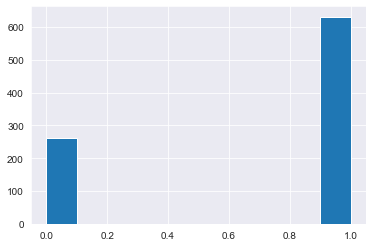

In [17]:
df_train["Age_over_K"].hist()

In [18]:
df_train_gruped = df_train.groupby(["Sex",  "Pclass", "Age_over_K"])
print(df_train_gruped["Survived"].mean())
df_train_gruped["Survived"].count()

Sex     Pclass  Age_over_K
female  1       0             0.916667
                1             0.975610
        2       0             1.000000
                1             0.906250
        3       0             0.569444
                1             0.430556
male    1       0             0.333333
                1             0.377551
        2       0             0.611111
                1             0.066667
        3       0             0.147541
                1             0.128889
Name: Survived, dtype: float64


Sex     Pclass  Age_over_K
female  1       0              12
                1              82
        2       0              12
                1              64
        3       0              72
                1              72
male    1       0              24
                1              98
        2       0              18
                1              90
        3       0             122
                1             225
Name: Survived, dtype: int64

# faktisk et forsøk 

In [19]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [20]:
# Feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df


,Feature,Importance
0,Pclass,0.215508
1,SibSp,0.077122
2,Parch,0.080406
3,Sex_female,0.342297
4,Sex_male,0.284667


In [21]:
# Inspecting the first tree in the forest
first_tree = model.estimators_[0]

# Print the depth of the first tree
print("Depth of the first tree:", first_tree.tree_.max_depth)

# Print the number of leaves in the first tree
print("Number of leaves in the first tree:", first_tree.tree_.n_leaves)


Depth of the first tree: 5
Number of leaves in the first tree: 17
